In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
print("uv is working")

uv is working


In [2]:
#File
data = pd.read_excel("Ryan W Locations.xlsx")

In [3]:
# Select Columns
coords = data[['latitude', 'longitude']]

In [4]:
# DBSCAN
model = DBSCAN(eps=1, min_samples=2)
labels = model.fit_predict(coords)

<Axes: xlabel='longitude', ylabel='latitude'>

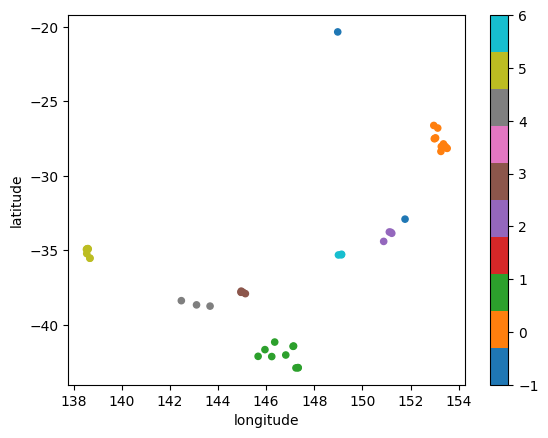

In [5]:
# Scatter Plot
data['cluster'] = labels
data.plot.scatter(x='longitude', y='latitude', c=labels, colormap='tab10')

In [6]:
score = silhouette_score(coords, labels)
print(f"Silhouette score: {score:.2f}")

Silhouette score: 0.78


# Now for the Iris Dataset

In [7]:
import sklearn.datasets
iris = sklearn.datasets.load_iris()

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

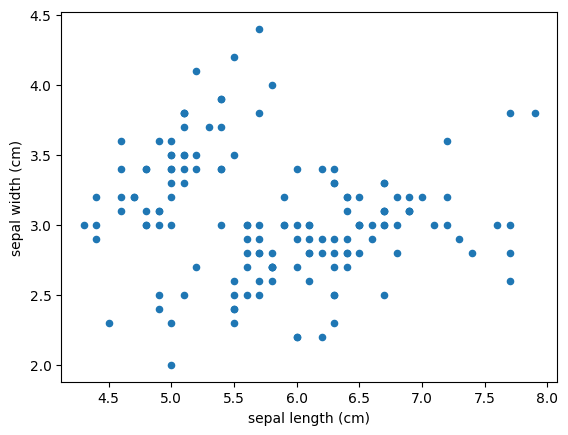

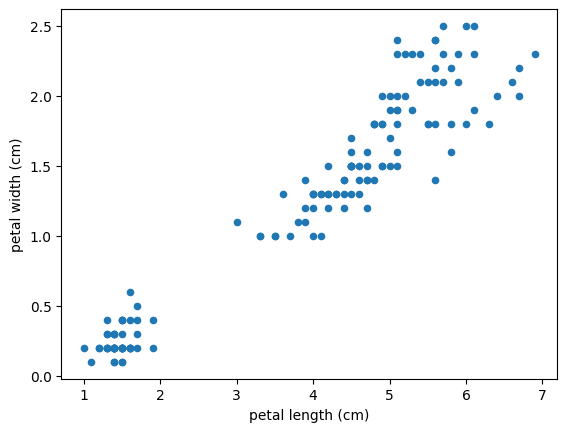

In [8]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.plot.scatter(x='sepal length (cm)', y='sepal width (cm)')
data.plot.scatter(x='petal length (cm)', y='petal width (cm)')

Silhouette Score: 0.5511916046195927


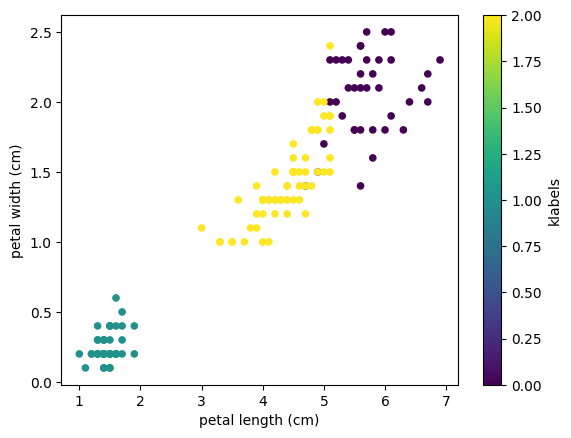

In [9]:
cluster_data = data.copy()
KMeans = sklearn.cluster.KMeans(n_clusters=3, random_state=2200)
klabels = KMeans.fit_predict(cluster_data)
cluster_data['klabels'] = klabels

cluster_data.plot.scatter(x='petal length (cm)', y='petal width (cm)', c='klabels', colormap='viridis')

score = sklearn.metrics.silhouette_score(cluster_data[iris.feature_names], cluster_data['klabels'])

print("Silhouette Score:", score)

In [10]:
cluster_data = data.copy()
for i in range(2, 6):
    KMeans_i = sklearn.cluster.KMeans(n_clusters=i, random_state=2200)
    klabels = KMeans_i.fit_predict(data.copy())
    cluster_data[f'kmeans_{i}'] = klabels

<Axes: >

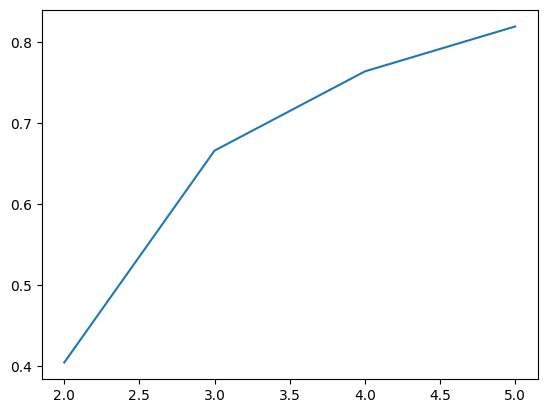

In [11]:
davies_scores = []
for i in range(2, 6):
    davies_scores.append(sklearn.metrics.davies_bouldin_score(cluster_data[iris.feature_names], cluster_data[f'kmeans_{i}']))

davies_scores = pd.Series(index=range(2, 6), data=davies_scores)
davies_scores.plot()

<Axes: >

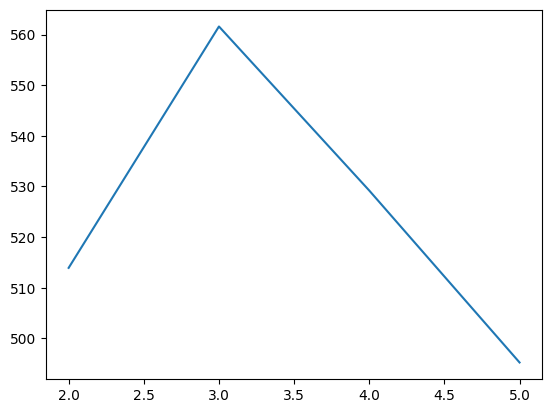

In [12]:
calinski_scores = []
for i in range(2, 6):
    calinski_scores.append(sklearn.metrics.calinski_harabasz_score(cluster_data[iris.feature_names], cluster_data[f'kmeans_{i}']))

calinski_scores = pd.Series(index=range(2, 6), data=calinski_scores)
calinski_scores.plot()

In [13]:
dbdata = cluster_data.copy()

DBScan = sklearn.cluster.DBSCAN(eps=0.5, min_samples=5)
dbdata['dbscan_cluster'] = DBScan.fit_predict(data[iris.feature_names])

sklearn.metrics.calinski_harabasz_score(dbdata[iris.feature_names], dbdata['dbscan_cluster'])

220.29751498443005